<a href="https://colab.research.google.com/github/anushka-dere/text-mining/blob/main/Text_mining_assignment(amazon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [68]:
iphone_reviews = []

In [69]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [70]:
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [71]:
import os
os.getcwd()

'/content'

In [72]:
red_rev_string = " ".join(iphone_reviews)

In [73]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [74]:
red_rev_string

' been using iphone pro since january i love it many used to tell me that buying pros online isn t safe but it s working well so far i love it as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is 

Splitting each word with space -- Tokanization

In [75]:
red_rev_words = red_rev_string.split(" ")

In [76]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

Joining all the reviews into single paragraph

In [78]:
red_rev_string =" ".join(red_rev_words)

In [79]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

In [80]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

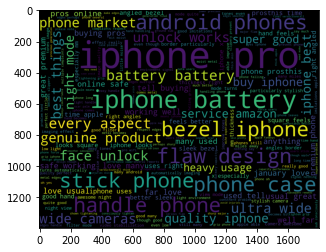

In [81]:
plt.imshow(wordcloud_ip)

negative words choose path for -ve words stored in system

In [82]:
with open("/content/positive-words.txt","r") as positive:
  poswords = positive.read().split("\n")

In [83]:
poswords =poswords[37:]

Considering only the words which are present in the positive words

In [84]:
red_pos = " ".join([w for w in red_rev_words if w in poswords])

Building Positive word cloud


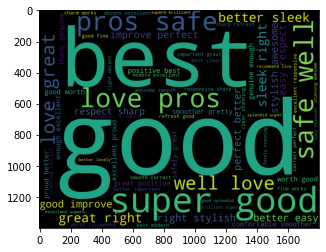

In [85]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

Unique words

In [86]:
red_unique = list(set(" ".join(iphone_reviews).split(" ")))

In [87]:
red_unique

['',
 'Face',
 'pro.',
 'twice',
 'an',
 'taking',
 'From',
 'i',
 'iPhone',
 'highly',
 'cheap',
 'more',
 'miles',
 'user',
 'generation.Final',
 'has',
 ')',
 '(32GB)',
 'One',
 'Amazon.Super',
 '2020',
 'against',
 'worth',
 'battery',
 'bezel',
 'aspect',
 'VerdictOverall,',
 'iPhone12pro',
 'not',
 '6',
 'each',
 'balance',
 'proved',
 'was',
 'online',
 '.ConsThere',
 'batter',
 'low-light',
 'problem.',
 '(512GB).',
 'modern',
 '20’s',
 'stick',
 'recommend',
 'it.',
 'tones.Image',
 'fine',
 'since',
 'However,',
 'view,',
 'had',
 'Review',
 'jump',
 'dark',
 'drop',
 'seamless.',
 '2',
 'camera',
 'Wifi',
 'mask',
 'equally',
 'lens',
 'other',
 'save',
 'no',
 'sending',
 'care',
 '.Only',
 'splendid,',
 'would',
 'edges.',
 'say!',
 'fanboy',
 'we',
 'so',
 'genuine',
 'big',
 'fingerprint',
 'perfect.The',
 'Graphite',
 'it!\n',
 'Android.Just',
 'product',
 'page',
 'now',
 'are',
 'smaller',
 'takes',
 'multiple',
 'it',
 'iPhones',
 'June',
 'premium',
 'which',
 'cell

## Emotional Mining

Sentiment analysis

In [88]:
import pandas as pd

In [89]:
afinn = pd.read_csv("/content/Afinn.csv", sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [90]:
afinn.shape

(2477, 2)

In [91]:
from nltk import tokenize

In [94]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [95]:
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

['It feels better than the sleek bezel of the iPhone X, especially the 7.4mm thickness with right angles.',
 'The border is particularly stylish.The camera is awesome!',
 'The night view mode turns on automatically, and the imaging effect is really good!',
 'Video stabilization is also good!!!!!!!',
 '!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.']

In [96]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nBeen using iphone12pro since January & I lov...
1,Many used to tell me that buying 12 pros onlin...
2,But it's working well so far.
3,I love it!
4,As usual great & premium phone of 2020 .ProsTh...
...,...
725,Especially there is no phone in market clickin...
726,Graphite colour is lovely with glossy sides.
727,Stunning look.Awesome experience using dark mo...
728,makes life so easy and seamless.


In [97]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [98]:
import spacy

In [99]:
spacy.load('en_core_web_sm')

In [100]:
from spacy.lang.en import English

In [101]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

In [102]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [103]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

In [104]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [105]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

In [106]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [107]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [108]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [109]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1    12
2     6
3     3
4    32
5    18
6     8
7    14
8     5
9     6
Name: word_count, dtype: int64

In [110]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
185,"But overall , its good phone and worth the pri...",13,49
112,"But overall , its good phone and worth the pri...",13,49
331,"But overall , its good phone and worth the pri...",13,49
39,"But overall , its good phone and worth the pri...",13,49
477,"But overall , its good phone and worth the pri...",13,49
623,"But overall , its good phone and worth the pri...",13,49
404,"But overall , its good phone and worth the pri...",13,49
258,"But overall , its good phone and worth the pri...",13,49
696,"But overall , its good phone and worth the pri...",13,49
550,"But overall , its good phone and worth the pri...",13,49


In [111]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    730.000000
mean       2.178082
std        2.987594
min       -3.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: sentiment_value, dtype: float64

In [112]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
2,But it's working well so far.,0,6
5,It feels better than the sleek bezel of the iP...,0,18
12,"** Signal, nothing to say!",0,5
13,It is much better in iPhone 12 Pro & Wifi also...,-2,21
15,The iPhone 12 comes with metal edges and there...,0,18


In [113]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
39,"But overall , its good phone and worth the pri...",13,49
61,This iPhone 12pro Is the best in all the thing...,11,41
65,I ordered the phone on 20th June at night (11:...,10,27
70,Stunning look.Awesome experience using dark mo...,11,14
112,"But overall , its good phone and worth the pri...",13,49


In [114]:
sent_df['index']=range(0,len(sent_df))

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


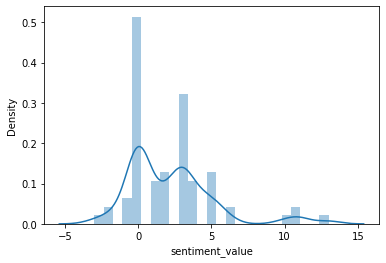

In [116]:
sns.distplot(sent_df['sentiment_value'])

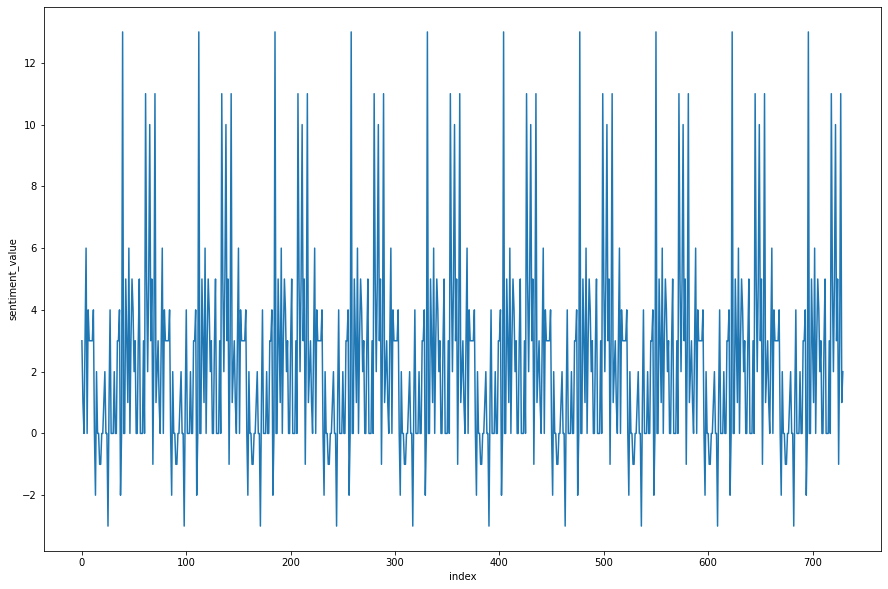

In [117]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

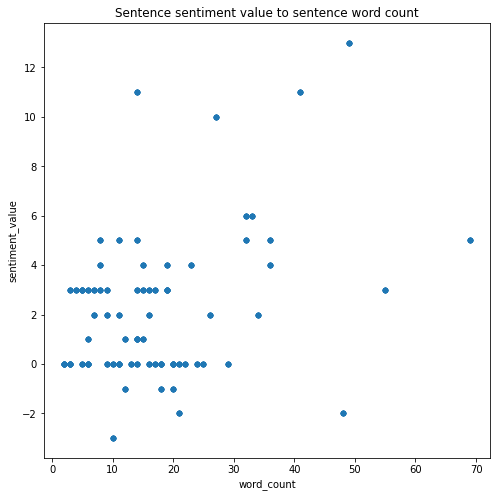

In [118]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')